# Implementing Naïve Bayes Classifier Using Python

## Theory

##### <b>Overview </b>
<img src="https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png">

##### <b>Assumptions</b>
1. All the feature are equal contributor
2. All features are independent

#### <b>Types of Naïve Bayes Classifiers</b>
1. <b>Gausian Naïve Bayes</b><br>
    It supportes continuous feature which follow Gaussian (normal) distribution, e.g if we have take 'Age' and 'Salary' which are continuous variable and 'Purhcased Iphone' as Target, then we can use Gaussian Naive Bayes. Note: Feature are continous but not the target.

2. <b>Bernoulli Naïve Bayes</b><br>
    It is used when all the features are in Binary or having just 2 classes, e.g if we have taken 'Gender' as our feature and 'Purchased Iphone' as target.
    Another example is to classify if a text is spam or not, for each word we create a column (feature) and mark 1 if word is present in text else 0 as our feature and have target variable as "Spam" or "Not Spam" (1/0).

3. <b>Multinomial Naïve Bayes</b>
    It is used when count or frequency of freature is also important for classification, e.g frequency of each word when predicting spam or not, or count of 1 start-5 star hating for labeling movie as 'Hit', 'Super Hit' or 'Flop'.

    Note: when a feature is not present in training data set (like a unknown word), this causes 
    problem of zero probability in Naïve Bayes, which can be handled by 'Laplace Smoothing'.

## Examples

### Importing Modules

In [1]:
# removing future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for data manipulation
import pandas as pd
import numpy as np 

# for splitting the data into train and test samples
from sklearn.model_selection import train_test_split 
# for model evaluation metrics
from sklearn.metrics import classification_report 
# for scaling the data of numerical columns
from sklearn.preprocessing import StandardScaler


# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

### Gaussian Naïve Bayes

In [2]:
# Importing the data
df_inp_gaussian = pd.read_csv('./datasets/gaussian_nb_sample_dataset.csv')
df_inp_gaussian.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# checking overview of the data
print("*"*5,'Discription',"*"*5)
display(df_inp_gaussian.describe())

print("*"*5,'Correlations',"*"*5)
display(df_inp_gaussian.corr())

print("*"*5,'Is Null',"*"*5)
display(df_inp_gaussian.isna().sum())

***** Discription *****


,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


***** Correlations *****


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


***** Is Null *****


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<AxesSubplot: title={'center': 'Age Distribution'}, ylabel='Density'>

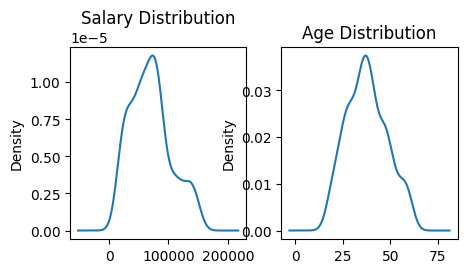

In [4]:
# Checking distribution of the salary and age
from matplotlib import pyplot as plt

fig, (axs1,axs2) = plt.subplots(1, 2)

df_inp_gaussian['Salary'].plot.kde(figsize=(5,2.5),ax=axs1,title='Salary Distribution')
df_inp_gaussian['Age'].plot.kde(figsize=(5,2.5),ax=axs2,title='Age Distribution')

In [5]:
# Feature Engineering
# 1. Handling Missing Data
# 2. Handling Categorical Data
# 3. Feature Scaling

# 3. Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_inp_gaussian[['Age','Salary']]=scaler.fit_transform(df_inp_gaussian[['Age','Salary']])
df_inp_gaussian.head()


,Gender,Age,Salary,Purchase Iphone
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


In [6]:
# Model Creation

# 1. Spliting Featurea and Targets
X=df_inp_gaussian[['Age','Salary']]
y=df_inp_gaussian['Purchase Iphone'].values

# 2. Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Fit the model
gaussina_nb_obj = GaussianNB()
gaussina_nb_model = gaussina_nb_obj.fit(X_train, y_train)

# 4. Predict class labels on a test data
pred_labels = gaussina_nb_model.predict(X_test)
    
# 5. Getting the Accuracy Scroe
display('*'*50)
gaussina_nb_score = gaussina_nb_model.score(X_test, y_test)
display(f'Accuracy Score of Gaussian NB {gaussina_nb_score*100.00:0.3f}%')
display('*'*50)

# 6. Overall Classfication Report
print(classification_report(y_test, pred_labels))

'**************************************************'

'Accuracy Score of Gaussian NB 89.167%'

'**************************************************'

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



#### <b>Confusion Metrics</b>
<img src='https://www.researchgate.net/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png' width="500" height="300" filter=invert(48%)>

##### <b>Terminologies</b>
1. <b>Recall</b><br>
    Signifies number of positive we have predicted correctly out of total actual positives, higher recall means model is not missing much out on True Positives (TP), another way of saying is though it might be predicting too many(or less) False Positive, its not missing out the actual ones. It keeps False Negatives in check.<br> 
    Note: The base is in terms of actual positives

2. <b>Precision</b><br>
    Signifies number of positive we have predicted correctly out of total positives prediction, higher precision means model is show too many False Positives It keeps False Positive in check.<br>
    Note: The base is in terms of predicted positives.

2. <b>F1 Score</b><br>
    It is the Harmonic Mean of Recall and Precision. 
    
    <img src='https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png' width="200" height="50">



### Bernoulli Naïve Bayes

In [7]:
# Importing the data
df_inp_bernoulli = pd.read_csv('./datasets/bernoulli_nb_sample_dataset.csv')
display(df_inp_bernoulli.describe())
df_inp_bernoulli.head()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
# checking number of classe in each column
df_inp_bernoulli.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot: >

52_57


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23_28,F,HIGH,HIGH,23_26,drugY
1,46_51,M,LOW,HIGH,13_15,drugC
2,46_51,M,LOW,HIGH,10_12,drugC
3,23_28,F,NORMAL,HIGH,0_8,drugX
4,58_63,F,LOW,HIGH,16_19,drugY


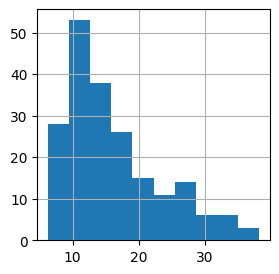

In [9]:
# Feature Engineering
# 1. Handling Missing Data
# 2. Feature Creation
# 3. Handling Categorical Data
# 4. Feature Scaling

# 1. Handling Missing Data - NA
display(df_inp_bernoulli.isna().sum())

# 2. Feature Creation
# Creating Bins for Age and Na_to_K Feature
# display(df_inp_bernoulli['Age'].hist(figsize=(3,3)))
display(df_inp_bernoulli['Na_to_K'].hist(figsize=(3,3)))

def get_age_bin(age):
    bins = {22:'0_22',28:'23_28',45:'29_45',51:'46_51',57:'52_57',63:'58_63',68:'64_68',100:'Above 68'}
    for key,value in bins.items():
        if age<=key:
            return value
print(get_age_bin(55))

def get_na_to_k_bin(age):
    bins = {8:'0_8',12:'10_12',15:'13_15',19:'16_19',22:'20_22',26:'23_26',28:'27_28',100:'Above 28'}
    for key,value in bins.items():
        if age<=key:
            return value

df_inp_bernoulli['Age']=df_inp_bernoulli['Age'].apply(get_age_bin)
df_inp_bernoulli['Na_to_K']=df_inp_bernoulli['Na_to_K'].apply(get_na_to_k_bin)

df_inp_bernoulli.head()


In [10]:
# Feature Engineering
# 3. Handling Categorical Data
from sklearn.preprocessing import OrdinalEncoder

# encoding to binary classes using pandas 
df_inp_bernoulli=pd.get_dummies(df_inp_bernoulli,columns=['Age','Sex','BP','Cholesterol','Na_to_K'])
display(df_inp_bernoulli.head())

,Drug,Age_0_22,Age_23_28,Age_29_45,Age_46_51,Age_52_57,Age_58_63,Age_64_68,Age_Above 68,Sex_F,...,Cholesterol_HIGH,Cholesterol_NORMAL,Na_to_K_0_8,Na_to_K_10_12,Na_to_K_13_15,Na_to_K_16_19,Na_to_K_20_22,Na_to_K_23_26,Na_to_K_27_28,Na_to_K_Above 28
0,drugY,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,drugC,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,drugC,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,drugX,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,drugY,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [11]:
# encoding Drug target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df_inp_bernoulli['Drug'].values)
df_inp_bernoulli['Drug']=label_encoder.transform(df_inp_bernoulli['Drug'].values)
display(df_inp_bernoulli.head())

,Drug,Age_0_22,Age_23_28,Age_29_45,Age_46_51,Age_52_57,Age_58_63,Age_64_68,Age_Above 68,Sex_F,...,Cholesterol_HIGH,Cholesterol_NORMAL,Na_to_K_0_8,Na_to_K_10_12,Na_to_K_13_15,Na_to_K_16_19,Na_to_K_20_22,Na_to_K_23_26,Na_to_K_27_28,Na_to_K_Above 28
0,4,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,4,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [12]:
# Model Creation

# 1. Spliting Featurea and Targets
X_bernoulli=df_inp_bernoulli.iloc[:,1:]
y_bernoulli=df_inp_bernoulli['Drug'].values

# 2. Create training and testing samples
X_bernoulli_train, X_bernoulli_test, y_bernoulli_train, y_bernoulli_test = train_test_split(X_bernoulli, y_bernoulli, test_size=0.45, random_state=0)

# 3. Fit the model
bernoulli_nb_obj = BernoulliNB()
bernoulli_nb_model = bernoulli_nb_obj.fit(X_bernoulli_train, y_bernoulli_train)

# 4. Predict class labels on a test data
pred_bernoulli_labels = bernoulli_nb_model.predict(X_bernoulli_test)
    
# 5. Getting the Accuracy Scroe
display('*'*50)
bernoulli_nb_score = bernoulli_nb_model.score(X_bernoulli_test, y_bernoulli_test)
display(f'Accuracy Score of Bernoulli NB {bernoulli_nb_score*100.00:0.3f}%')
display('*'*50)

# 6. Overall Classfication Report
print(classification_report(y_bernoulli_test, pred_bernoulli_labels))

# 7. Decoding Values
distinct_codes = list(set(pred_bernoulli_labels))
print([i for i in zip(distinct_codes,label_encoder.inverse_transform(distinct_codes))])

'**************************************************'

'Accuracy Score of Bernoulli NB 96.667%'

'**************************************************'

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.57      0.73         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        41

    accuracy                           0.97        90
   macro avg       0.95      0.91      0.92        90
weighted avg       0.97      0.97      0.96        90

[(0, 'drugA'), (1, 'drugB'), (2, 'drugC'), (3, 'drugX'), (4, 'drugY')]


### Multinomial Naïve Bayes

In [13]:
# Importing the data
df_inp_multinomial = pd.read_csv('./datasets/multinomial_nb_sample_dataset.csv')
display(df_inp_multinomial.describe())
df_inp_multinomial.head()

,1_star,2_start,3_start,4_star,5_start
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,5.142857,3.714286,5.785714,9.571429,10.000000
std,7.862835,1.898525,3.925823,6.296694,7.775702
min,0.000000,1.000000,2.000000,0.000000,0.000000
25%,0.000000,2.250000,3.250000,3.000000,2.500000
50%,1.000000,4.000000,5.000000,10.500000,9.500000
75%,11.500000,4.000000,6.000000,15.000000,17.750000
max,20.000000,9.000000,15.000000,18.000000,20.000000


,1_star,2_start,3_start,4_star,5_start,Type
0,0,3,4,10,9,'Hit'
1,1,5,4,15,9,'Hit'
2,0,4,5,15,20,'Super Hit'
3,20,2,2,1,0,'Flop'
4,1,4,5,13,10,'Hit'


In [14]:
# checking for missing values
df_inp_multinomial.isna().sum()

1_star     0
2_start    0
3_start    0
4_star     0
5_start    0
Type       0
dtype: int64

In [15]:
# Feature Engineering
# 1. Handling Missing Data
# 2. Feature Creation
# 3. Handling Categorical Data
# 4. Feature Scaling

In [16]:
# encoding Type target
from sklearn.preprocessing import LabelEncoder
label_encoder_multinomial = LabelEncoder()
label_encoder_multinomial.fit(df_inp_multinomial['Type'].values)
df_inp_multinomial['Type']=label_encoder_multinomial.transform(df_inp_multinomial['Type'].values)
display(df_inp_multinomial.head())

,1_star,2_start,3_start,4_star,5_start,Type
0,0,3,4,10,9,1
1,1,5,4,15,9,1
2,0,4,5,15,20,2
3,20,2,2,1,0,0
4,1,4,5,13,10,1


In [17]:
# Model Creation

# 1. Spliting Featurea and Targets
X_multinomial=df_inp_multinomial.iloc[:,:-1]
y_multinomial=df_inp_multinomial['Type'].values

# 2. Create training and testing samples
X_multinomial_train, X_multinomial_test, y_multinomial_train, y_multinomial_test = train_test_split(X_multinomial, y_multinomial, test_size=0.4, random_state=0)

# 3. Fit the model
multinomial_nb_obj = MultinomialNB()
multinomial_nb_model = multinomial_nb_obj.fit(X_multinomial_train,y_multinomial_train)

# 4. Predict class labels on a test data
pred_multinomial_labels = multinomial_nb_model.predict(X_multinomial_test)
    
# 5. Getting the Accuracy Scroe
display('*'*50)
multinomial_nb_score = multinomial_nb_model.score(X_multinomial_test, y_multinomial_test)
display(f'Accuracy Score of multinomial NB {multinomial_nb_score*100.00:0.3f}%')
display('*'*50)

# 6. Overall Classfication Report
print(classification_report(y_multinomial_test, pred_multinomial_labels))

# 7. Decoding Values
distinct_codes = list(set(pred_multinomial_labels))
print([i for i in zip(distinct_codes,label_encoder_multinomial.inverse_transform(distinct_codes))])

'**************************************************'

'Accuracy Score of multinomial NB 100.000%'

'**************************************************'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[(0, "'Flop'"), (1, "'Hit'"), (2, "'Super Hit'")]
